In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn import linear_model

%matplotlib inline

In [2]:
# import data into dataframe

df = pd.read_csv("Data.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


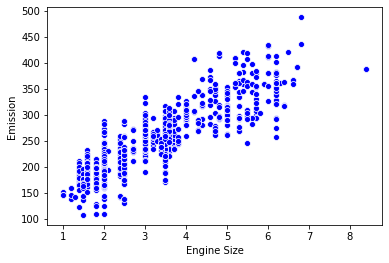

In [5]:
#Plotting Engine size vs CO2 emissions

sns.scatterplot(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [6]:
# splitting data set into training data and test data

datamask = np.random.rand(len(df)) < 0.8
train_data = cdf[datamask]
test_data = cdf[~datamask]

In [9]:
# fitting regression line 

regr = linear_model.LinearRegression()
x = np.asanyarray(train_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train_data[['CO2EMISSIONS']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.04481269  7.43400078  9.45655676]]


In [14]:
#Evaluating the regession fit and checking Variance Score

test_x = np.asanyarray(test_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test_data[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

mse = np.mean((test_y_hat - test_y)**2)

print('Residual sum of squares: %.2f' % mse)
print('Variance score: %.2f' % regr.score(test_x, test_y))

Residual sum of squares: 549.09
Variance score: 0.87


$\texttt{Variance Score }(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  

In [69]:
# Fitting regression for Fuel Consumption on different independent variables

regr_1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(train_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY']])
train_y1 = np.asanyarray(train_data[['CO2EMISSIONS']])
regr_1.fit(train_x1, train_y1)

print('Coeffecients: ', regr_1.coef_)

Coeffecients:  [[11.85419668  9.44381759 10.35101198]]


In [70]:
#Evaluating the regession fit and checking Variance Score

test_x1 = np.asanyarray(test_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY']])
test_y1 = np.asanyarray(test_data[['CO2EMISSIONS']])
test_y1_hat = regr_1.predict(test_x1)

rse = np.mean((test_y1_hat - test_y1)**2)

print('Residual sum of squares: %.2f' %rse)
print('Variance Score: %.2f' % regr_1.score(test_x1, test_y1))

Residual sum of squares: 576.64
Variance Score: 0.86


In [71]:
# Predicting CO2 emissions for different data

X_predict = np.asanyarray([[3.2, 8, 4.3]])

print('CO2 Emissions for Engine size of 3.2, 8 cylinders and Highway fuel consumption of 4.3 litres is %.2f'
     % regr_1.predict(X_predict))

CO2 Emissions for Engine size of 3.2, 8 cylinders and Highway fuel consumption of 4.3 litres is 221.74


In [52]:
# Splitting data to fit regression line for all the variables

cdf_2 = df.iloc[:,[4,5,8,9,10,11,12]]
mask_1 = np.random.rand(len(df)) < 0.8

train_data1 = cdf_2[mask_1]
test_data1 = cdf_2[~mask_1]

In [68]:
# Fitting regression for Fuel Consumption on all the independent variables

regr_2 = linear_model.LinearRegression()

train_x2 = np.asanyarray(train_data1.iloc[:,:-1])
train_y2 = np.asanyarray(train_data1.iloc[:,-1])

regr_2.fit(train_x2, train_y2)

print('Coeffecients: ', regr_2.coef_)

Coeffecients:  [ 8.27724963  8.27851888 -8.0128977  -1.61088959 13.37539092 -3.74089631]


In [75]:
#Evaluating the regession fit and checking Variance Score

test_x2 = np.asanyarray(test_data1.iloc[:,:-1])
test_y2 = np.asanyarray(test_data1.iloc[:,-1])
test_y2_hat = regr_2.predict(test_x2)

rse = np.mean((test_y2_hat - test_y2) ** 2)

print('Residual sum of squares: %.2f' % rse)
print('Variance score: %.2f' % regr_2.score(test_x2, test_y2))

Residual sum of squares: 357.60
Variance score: 0.91
